<a href="https://colab.research.google.com/github/lopes-adriano/machine-learning/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de ML - Aprendizado supervisionado

Aluno: Adriano Ferreira Lopes

Matrícula: 201802671

## Arvore de Decisão (Decision Tree)

### Introdução

Uma Árvore de Decisão é um modelo de aprendizado de máquina que representa decisões e suas possíveis consequências em forma de uma estrutura de árvore. Cada nó interno da árvore representa uma decisão baseada em uma característica (atributo), e cada ramo representa o resultado dessa decisão. Os nós folha representam as saídas ou classes finais. O processo de tomada de decisão ocorre percorrendo a árvore, da raiz até uma folha, seguindo os ramos correspondentes às condições satisfeitas.

### Aplicações

- Classificação em Medicina: Diagnóstico médico com base em sintomas e características do paciente.

- Detecção de Fraudes Financeiras: Identificação de transações suspeitas com base em padrões de comportamento.

- Segmentação de Mercado: Divisão de consumidores com base em características demográficas e comportamentais.

### Vantagens

1. Interpretabilidade: Facilidade de interpretação, útil para tomadores de decisão não técnicos.

2. Lida com Dados Não Lineares: Capaz de modelar relações complexas entre características.

3. Não Exige Normalização dos Dados: Não é sensível à escala das características.

### Desvantagens

1. Overfitting: Tendência a se ajustar demais aos dados de treinamento, especialmente em árvores profundas.

2. Sensibilidade a Pequenas Variações: Pequenas mudanças nos dados podem levar a árvores drasticamente diferentes.

3. Enviesado para Classes Majoritárias: Em conjuntos de dados desbalanceados, a árvore pode favorecer classes majoritárias.

### Exemplo de código

In [32]:
# Importando bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
# Carregando o conjunto de dados Iris (um conjunto de dados incorporado no scikit-learn)
iris = load_iris()
X = iris.data
y = iris.target

iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = y
iris_df['target_names'] = iris.target_names[y]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [34]:
# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Criando e treinando a Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

In [36]:
# Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Modelo: {accuracy:.2f}')

Acurácia do Modelo: 1.00


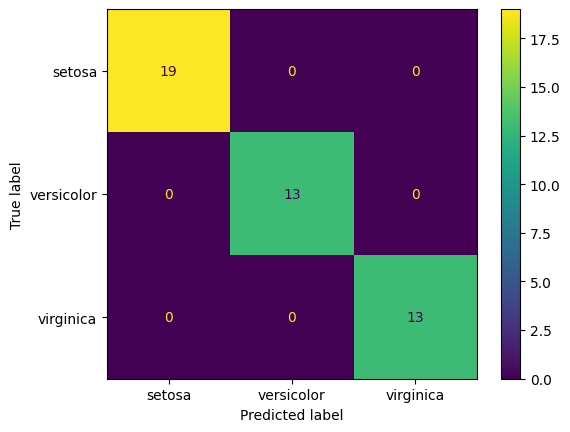

In [37]:
# Visualizando a Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot()
plt.show()

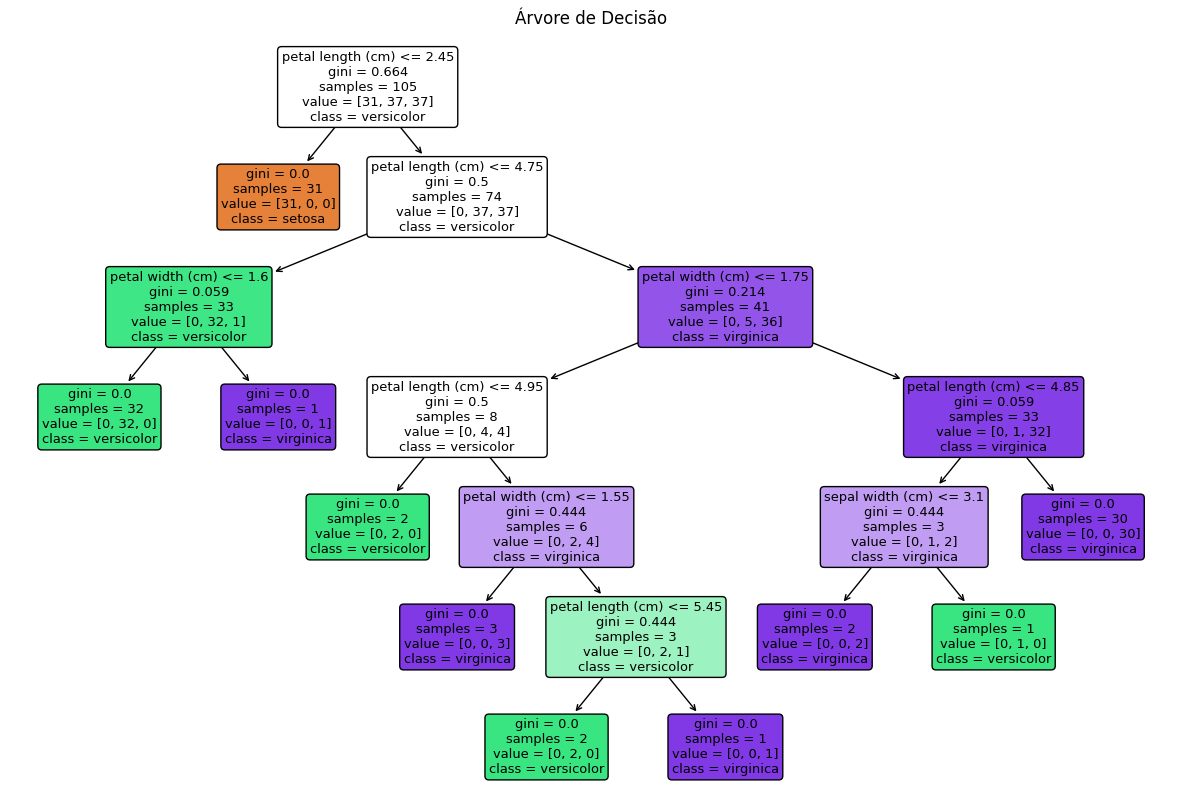

In [38]:
# Visualizando a Árvore de Decisão
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title('Árvore de Decisão')
plt.show()

1. Gini (Índice de Gini):

- O Gini é uma medida de impureza em um nó da árvore.
- Quanto menor o valor do Gini, mais puro é o nó, indicando que as instâncias no nó pertencem predominantemente a uma única classe.
- O Gini é calculado como a soma ponderada das probabilidades ao quadrado de cada classe. Um valor de 0 indica pureza total.

2. Values:

- "Values" refere-se à distribuição das classes nas instâncias do nó.
- Por exemplo, se um nó tiver "Values: [0, 5, 10]", isso significa que existem 5 instâncias da classe 1 e 10 instâncias da classe 2 no nó.
- Essa informação ajuda a entender a composição das instâncias em um nó específico.

3. Samples:

- "Samples" indica o número total de instâncias no nó.
- Por exemplo, se um nó tiver "Samples: 15", isso significa que há 15 instâncias no nó, independentemente de suas classes.